# ORIE 5355/INFO 5370 HW 1: Survey Weighting

 - Name: Fabio Deo
 - Net-id: fd232
 - Date: 09/13/2022
 - Late days used for this assignment: 0
 - Total late days used (counting this assignment): 0
 - People with whom you discussed this assignment: NA

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/AM1x5qEnLCvxsgrJ7

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2022/assignments/). In that link, we also give some tips on exporting your notebook to PDF, which is required for GradeScope submission. 

A few notes about this homework:
1. This homework is purposefully heavy in using the Pandas package. Being able to explore data is an essential data science skill that you'll use throughout this class and your career -- even if the polling/politics application is not interesting to you. I encourage you to practice Pandas and learn how to use it well. Your code will NOT be graded on efficiency.
2. Some of the questions can be interpreted in multiple ways. That is always true in data science. You'll need to make judgment calls for what analysis to do. For the homework, you'll still receive full points for any "reasonable" choice. Also feel free to ask questions on EdStem. 

# Conceptual component

### 1) Reading

<font color='blue'> Please read Sections 3 and 4 (pages 6-13) here: https://www.nber.org/system/files/working_papers/w20830/w20830.pdf, and answer the following questions.

<font color='blue'> Please summarize the sections in no more than two sentences. 

The article analyzes the eBay rating mechanism, first by explaining the metrics that eBay uses to rate sellers and consequently discussing the inherent bias of the data and the difficulties that stem from it from a customer standpoint. 

Then, the authors provide an additional metric (EPP) that tries to mitigate the bias observed and finally describe the data gathering and analysis process in section 4.

<font color='blue'> Do you think it's a problem that most ratings are positive? If so, why? Answer in no more than four sentences. Please incorporate concepts discussed in class in your answer. 

Yes, since it means that customers prefer to abstain rather than report negative feedback and the inability of customers to correctly interpret the rating scores as they are unaware of the spread of the scores especially for new users.

The data analysis of new eBay account holders shows a low retention in customers with 38% only making one purchase throughout their life-cycle which may be a result of their inability to chose good, reliable sellers and therefore not returning due to a possibly negative experience and then not reporting it.

### 2) Personal reflection

<font color='blue'> Think back to a time that you trained a model on data from people or gathered opinions via a survey (an informal one is fine). If you have not done that before, you may answer these questions about an article in the news that reported on public opinions or a model that you think might be in deployment at a company or organization with which you interact (for example, Amazon, google maps, etc)

<font color='blue'> Briefly summarize the scenario in no more than two sentences. 

During my undergrad I worked on a project to develop an app to automatically record orders and share them to the chefs, essentially automating part of waiters' job. 

As part of the project my team was asked to conduct surveys to gain more insight on the market needs and validate the business model.

<font color='blue'> What was the construct that you cared about/wanted to measure? What was the measurement (numerical data)? In what ways did the measurement not match the construct you cared about? Answer in no more than 4 sentences.  

We were trying to assess the need for the product and the market value that it would have, i.e. how much restaurants were willing to pay for the product, since it would also allow them to cut some operating costs on waiters. 

In terms of product need we assessed the likeability of the idea using the classic "how strongly would you prefer this product over classic waiting" question. The survey resulted in almost a 90+% of "strongly agree" and less than 1% of below average responses ("Disagree" or "Strongly Disagree").

For the price point, the data gathered resulted in an average price that was less than half of the price we wanted to market the application for.

<font color='blue'> What selection biases/differential non-response issues occurred and how did it affect your measurement? (If your answer is "None," explain exactly why you believe the assumptions discussed in class were met). Answer in no more than 3 sentences. 

This provided skewed results as the demographic we targeted was strongly influenced by our immediate connections (we interviewed several coursemates, friends and even relatives), that introduced positive bias to the survey.

From the product's price perspective, we kept the demographic more consistent to the actual target demographic of the product, i.e. restaurant owners, but the question itself introduces a strong negative bias to the responses as people tend to say that they are willing to spend less than what they actually are.

<font color='blue'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

From the market need standpoint, the main error was in the choice of the interviewees. In hindsight, having no personal connections with the people polled is a fundamental constraint since people are already biased towards giving positive feedback over negative, so introducing another degree of positive bias is certainly bad.

For the product price question, I would change it to multiple "would you be comfortable paying" questions on different price ranges, to try induce more honest responses and get a better overview of the market demand.

# Programming component

<font color='blue'> In this part of the homework, we provide you with data from a poll in Florida before the 2016 Presidential election in the United States. We also provide you with (one pollster's) estimates of who will vote in the 2016 election, made before the election. You will use this data and apply the weighting techniques covered in class.

## Preliminaries to load packages and data

In [633]:
import pandas as pd
import numpy as np

In [634]:
dfpoll = pd.read_csv('polling_data_hw1.csv') # raw polling data
dfpoll.head()

,candidate,age,gender,party,race,education
0,Someone else,30-44,Male,Independent,White,College
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
3,Hillary Clinton,65+,Female,Democrat,White,College
4,Donald Trump,65+,Female,Republican,White,High School


In [635]:
dfdemographic = pd.read_csv('florida_proportions_hw1.csv') # proportions of population
dfdemographic.head()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
0,0.387927,party,NaN,Democrat,NaN
1,0.398788,party,NaN,Republican,NaN
2,0.213285,party,NaN,Independent,NaN
3,0.445928,gender,NaN,Male,NaN
4,0.554072,gender,NaN,Female,NaN


In [636]:
dfdemographic.tail()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
112,0.034216,race,education,Hispanic,Some College
113,0.027588,race,education,Hispanic,College
114,0.010929,race,education,Other,High School
115,0.010570,race,education,Other,Some College
116,0.015142,race,education,Other,College


dfdemographic contains estimates of likely voters in Florida in 2016. When Demographic_Type_2 is NaN, the row refers to just the marginal population percentage of the group in Demographic_1 of type Demographic_Type_1. When it is not NaN, the row has the joint distribution of the corresponding demographic groups.

For example, row 0 means that 38.7927% of the electorate is from the Democrat party. Row 113 means that 2.7588% of the electorate is Hispanic AND graduated college. 

## Part A: Raw visualization

<font color='blue'> Here, we'll visualize whether the respondents in the poll match the likely voter estimates. Create a scatter-plot where each point represents one Demographic group (for example, party-Independent), where the X axis is the Electoral_Proportion in dfdemographic, and the Y axis is the proportion in dfpoll. 

I decided to use two scatter plots to analyze misrepresentation both on the single demographic group scale as well as on the pairs of demographic groups. 

I modified the scatter plots to show the "perfectly represented" line and markers with increasing size as they deviate from the line. 

This gives a nice visual intuition of the groups that are strongly misrepresented, where the plane over the blue line encompasses over-represented groups while the plane under the line the under-represented ones.
For clarity I have also labeled demographic groups in the legend as either (U) or (O) to mean respectively under and over-represented.

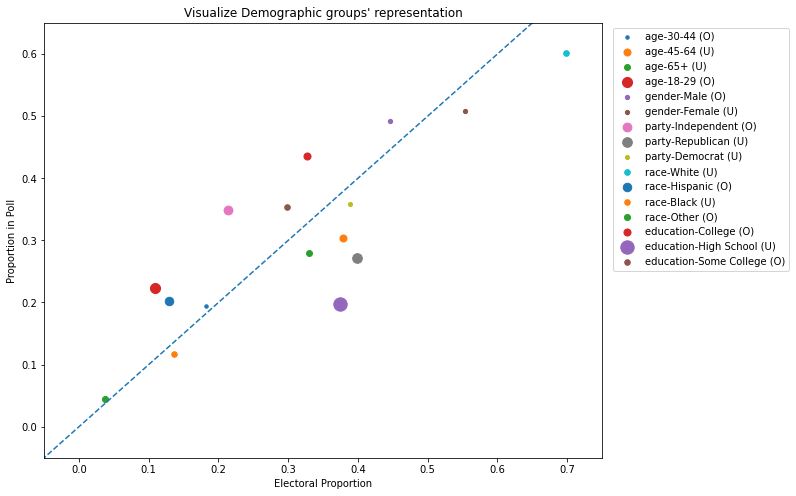

In [638]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for dtype in dfpoll.columns[1:] :
    for dem in dfpoll[dtype].unique():
        if dem == "Refused": continue
            
        dfpollOfDem = dfpoll.loc[dfpoll[dtype] == dem]
        pollProp = len(dfpollOfDem) / len(dfpoll)
        
        elec_prop = dfdemographic[(dfdemographic["Demographic_1"] == dem) & \
                                  (dfdemographic["Demographic_2"] != dfdemographic["Demographic_2"]) \
                                 ]["Electoral_Proportion"]
        
        lab = dtype + "-" + dem
        lab += " (O)" if pollProp > float(elec_prop) else " (U)"
        ax.scatter(float(elec_prop), pollProp, label = lab, s= 200 * abs(1 - float(elec_prop) / pollProp))

x = np.linspace(-1,1,10)
ax.plot(x, x, '--')

ax.set_xlim(-0.05, 0.75)
ax.set_ylim(-0.05, 0.65)
ax.set_xlabel("Electoral Proportion")
ax.set_ylabel("Proportion in Poll")
ax.set_title("Visualize Demographic groups' representation")

ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.show()

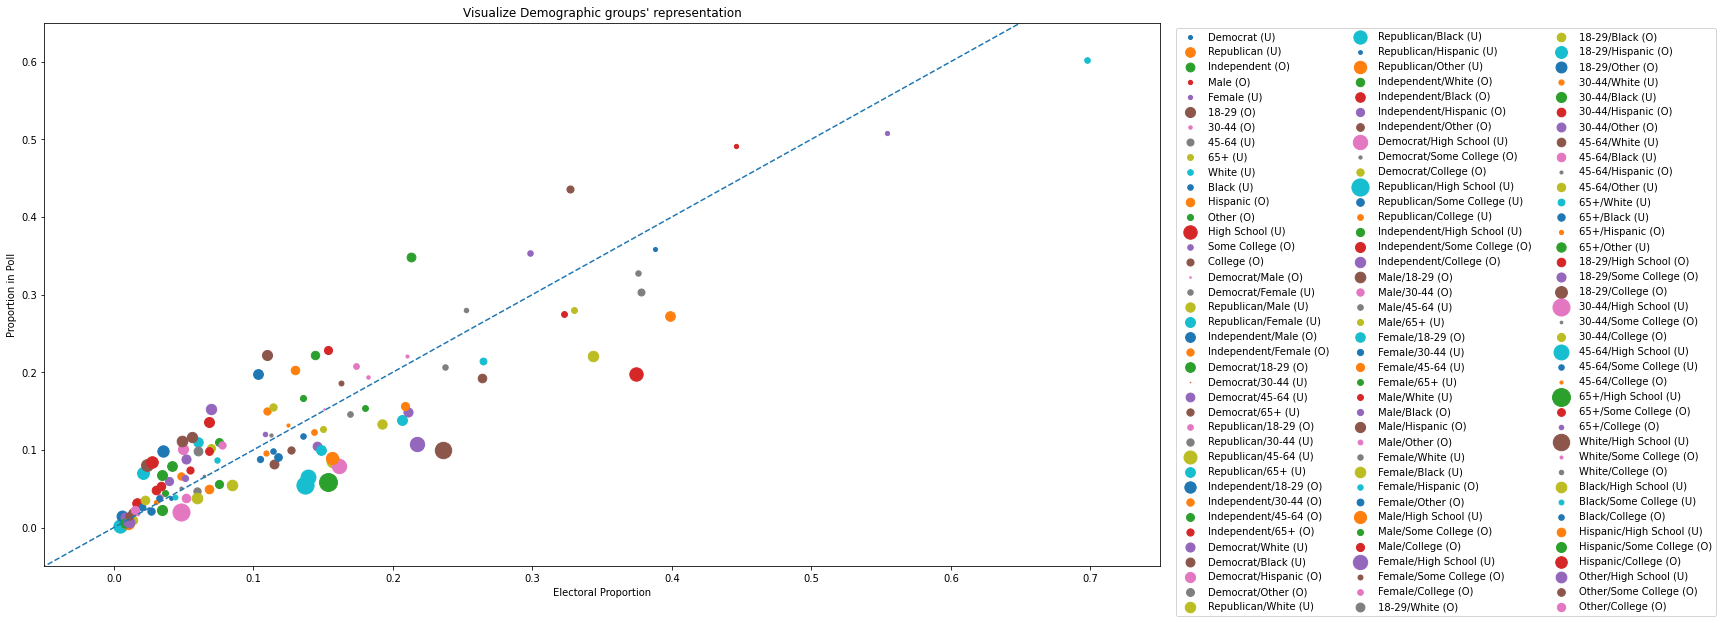

In [640]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for idx, row in dfdemographic.iterrows():
    demType1 = row['Demographic_Type_1']
    demType2 = row['Demographic_Type_2']
    dem1 = row['Demographic_1']  
    dem2 = row['Demographic_2']
    if pd.isna(demType2):
        lab = dem1
        dfpollOfDem = dfpoll.loc[dfpoll[demType1] == dem1]
    else :
        lab = dem1 + "/" + dem2
        dfpollOfDem = dfpoll.loc[(dfpoll[demType1] == dem1) & (dfpoll[demType2] == dem2)]
    pollProp = len(dfpollOfDem) / len(dfpoll)
    lab += " (O)" if pollProp > row["Electoral_Proportion"] else " (U)"
    ax.scatter(row["Electoral_Proportion"], pollProp, label = lab, \
               s= 200 * abs(1 - row["Electoral_Proportion"] / pollProp))

x = np.linspace(-1,1,10)
ax.plot(x, x, '--')

ax.set_xlim(-0.05, 0.75)
ax.set_ylim(-0.05, 0.65)
ax.set_xlabel("Electoral Proportion")
ax.set_ylabel("Proportion in Poll")
ax.set_title("Visualize Demographic groups' representation")

ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=3)
plt.show()

<font color='blue'>In your view, which group is most over-represented? Most under-represented? Why? Answer in no more than 3 sentences. There are multiple reasonable definitions of "over" or "under" represented; any choice is fine as long as you justify your answer.</font>

The metric I used to judge how much a demographic group is misrepresented is simply how much the ratio of Electoral proportion over the proportion of people from the same demographic included in the poll deviates from 1.

From looking only at marker sizes, it is visually clear that under-representation is more significant then over-representation. 

In particular, "High School" education seems is highly under-represented, while the age range "18-29" is largely over-represented. Digging deeper in the second scatterplot, we can see that these demographic groups paired with others generate sub-demographic groups that are even more mis-represented, such as "Republican - High School" and "18-29 - Hispanic".

## Part B: Weighting

<font color='blue'> For this question, we'll ignore people who answered anything but "Hillary Clinton" or "Donald Trump."


You'll notice that some of the groups in the polling data ("refused") do not show up in the population percentages. For the questions that require weighting by demographics, ignore those respondents.



### 1) Raw average

<font color='blue'> Below, report the "raw polling average," the percentage of people "Hillary Clinton" divided by the number who answered either Hillary or Trump.

In [641]:
hillaryOrTrumpPolls = dfpoll[(dfpoll["candidate"] == "Hillary Clinton") | (dfpoll["candidate"] == "Donald Trump")]
hillaryPolls = hillaryOrTrumpPolls[(hillaryOrTrumpPolls["candidate"] == "Hillary Clinton")]

hillaryAvg = round(len(hillaryPolls) / len(hillaryOrTrumpPolls), 5)

raw_avg = pd.DataFrame(columns = ['Hillary', 'Trump'])
raw_avg = raw_avg.append({'Hillary' : hillaryAvg, 'Trump': 1 - hillaryAvg} , ignore_index = True)

raw_avg

,Hillary,Trump
0,0.54583,0.45417


### 2) Single dimensional marginal weighting (on just 1 demographic type)

<font color='blue'> For each demographic type separately -- age, gender, party, race, and education -- weight the poll by just that demographic type, in accordance to the population proportions given. Report the resulting poll results, and briefly (at most 3 sentences) describe what you observe.


For example, when weighted by race, you'll report:

Weighted by race --- Clinton: 0.530, Trump: 0.470


Weighting by each demographic type we observe that using "education" has little to no impact on the polling average results.

While weighting by Age and Race has only a slight effect in correcting the poll results towards Trump, weighting by party skews the poll average in favor of the republican candidate.

Finally "Gender" is the only demographic type that has the opposite effect of skewing the poll results even more towards Hillary.

In [642]:
demo_groups = dfpoll.columns[1:]

dim_marginal_weighting = pd.DataFrame(columns = ['Weighted By', 'Hillary', 'Trump'])

for dgroup in demo_groups:
    hillaryWeighted = 0.0
    for dtype in dfpoll[dgroup].unique():
        if dtype == "Refused": 
            continue
        hillaryPolls = hillaryOrTrumpPolls[(hillaryOrTrumpPolls["candidate"] == "Hillary Clinton") & \
                                          (hillaryOrTrumpPolls[dgroup] == dtype)]
        trumpPolls = hillaryOrTrumpPolls[(hillaryOrTrumpPolls["candidate"] == "Donald Trump") & \
                                         (hillaryOrTrumpPolls[dgroup] == dtype)]
        totPolls = len(hillaryPolls) + len(trumpPolls)
        
        hillaryCurrWeighted = len(hillaryPolls) / totPolls
        
        elec_dist = dfdemographic[(dfdemographic["Demographic_1"] == dtype) & \
                                  (dfdemographic["Demographic_2"] != dfdemographic["Demographic_2"]) \
                                 ]["Electoral_Proportion"]
        elec_dist = float(elec_dist) if len(elec_dist) else 0.0

        hillaryWeighted += hillaryCurrWeighted * elec_dist
    
    hillaryWeighted = round(hillaryWeighted, 3)
    dim_marginal_weighting = dim_marginal_weighting.append({ \
                                'Weighted By' : dgroup, 
                                'Hillary': str(hillaryWeighted), 
                                'Trump': str(round(1 - hillaryWeighted, 3)) \
                             }, ignore_index = True \
                             )
dim_marginal_weighting

,Weighted By,Hillary,Trump
0,age,0.531,0.469
1,gender,0.55,0.45
2,party,0.499,0.501
3,race,0.53,0.47
4,education,0.544,0.456


### 2-dimensional joint distribution weighting

<font color='blue'>Now, for each pair of demographic types in dfdemographic, do the same -- weight the poll by that pair of demographic types, in accordance to the given joint distributions, and briefly (at most 3 sentences) describe what you observe.

For example, when weighted by race and age, you'll find:

Weighted by age and race: Clinton: 0.525, Trump: 0.475

Repeating the demographic type weighting using pairs of demographic groups, we have a more detailed view on each specific sub-demographics effects the data.

The general trend observed is that weighting helps correcting towards a more balanced result, and in some cases can even flip the prediction to favor Trump.

Only one pair of demographic groups "gender-education" skews the polling average even more in favor of the democrat, which aligns with what we observed in the previous exercise for the two groups observed singularly.

In [643]:
demo_groups = dfpoll.columns[1:]

dim_joint_weighting = pd.DataFrame(columns = ['Weighted By', 'And', 'Hillary', 'Trump'])

for i, dgroup1 in enumerate(demo_groups):
    for dgroup2 in demo_groups[i + 1:]:
        hillaryWeighted = 0.0
        for dtype1 in dfpoll[dgroup1].unique():
            for dtype2 in dfpoll[dgroup2].unique():

                if dtype1 == "Refused" or dtype2 == "Refused": 
                    continue
                hillaryPolls = hillaryOrTrumpPolls[(hillaryOrTrumpPolls["candidate"] == "Hillary Clinton") & \
                                                  (hillaryOrTrumpPolls[dgroup1] == dtype1) & \
                                                  (hillaryOrTrumpPolls[dgroup2] == dtype2)]
                trumpPolls = hillaryOrTrumpPolls[(hillaryOrTrumpPolls["candidate"] == "Donald Trump") & \
                                                 (hillaryOrTrumpPolls[dgroup1] == dtype1) & \
                                                 (hillaryOrTrumpPolls[dgroup2] == dtype2)]
                totPolls = len(hillaryPolls) + len(trumpPolls)

                hillaryCurrWeighted = len(hillaryPolls) / totPolls

                elec_dist = dfdemographic[((dfdemographic["Demographic_1"] == dtype1) & \
                                          (dfdemographic["Demographic_2"] == dtype2)) | \
                                          ((dfdemographic["Demographic_1"] == dtype2) & \
                                          (dfdemographic["Demographic_2"] == dtype1))
                                         ]["Electoral_Proportion"]

                elec_dist = float(elec_dist) if len(elec_dist) else 0.0

                hillaryWeighted += hillaryCurrWeighted * elec_dist
    
        hillaryWeighted = round(hillaryWeighted, 3)
        dim_joint_weighting = dim_joint_weighting.append({ \
                                    'Weighted By' : dgroup1,
                                    'And': dgroup2,
                                    'Hillary': str(hillaryWeighted), 
                                    'Trump': str(round(1 - hillaryWeighted, 3)) \
                                 }, ignore_index = True \
                              )
dim_joint_weighting

,Weighted By,And,Hillary,Trump
0,age,gender,0.533,0.467
1,age,party,0.498,0.502
2,age,race,0.525,0.475
3,age,education,0.525,0.475
4,gender,party,0.503,0.497
5,gender,race,0.535,0.465
6,gender,education,0.548,0.452
7,party,race,0.501,0.499
8,party,education,0.494,0.506
9,race,education,0.514,0.486


### 3) 2-dimensional marginal 

<font color='blue'>We don't always have access to joint distributions across the population -- for example, it may be hard to estimate from past exit polls (surveys done as people are leaving the polling station) what the joint distribution of education and gender is, for example. However, access to marginal distributions are often available. 

As discussed in class, one strategy when you don't have access to joint distributions -- only marginals -- is to _multiply_ the marginal distributions. For example, if 50% of your population is Democratic and 50% is a woman, then pretend that 50% times 50% = 25% of your population is a Democratic women. Clearly this technique is not perfect, but it is sometimes a useful heuristic.   

For the following pairs of Demographic types, report the weighting results if you use the joint distributions in dfdemographic versus if you approximate the joint distribution using the marginals. Briefly (at most 3 sentences) describe what you observe.

(party, gender)

(race, gender)

It seems that 2-dimensional marginal distribution does a pretty good job at predicting the joint distribution of a demographic group pair based on the distribution of each demographic group singularly. 

Both for the pair "party-gender" and "race-gender" the joint distribution estimate falls within a 0.001 range to the actual electoral proportion provided for the joint demographic group. 

As an example output, here's the results for two other pairs of demographics:

|    | Demo1   | Demo2     |    Joint |
|---:|:--------|:----------|---------:|
|  0 | age     | race      | 0.524516 |
|  1 | age     | education | 0.525483 |

In [644]:
demo_groups = dfpoll.columns[1:]

dim_marginal_join_weighting = pd.DataFrame(columns = ['Weighted By', 'And', 'Hillary(Marg)', 'Trump(Marg)', 'Hillary(Join)', 'Trump(Join)'])

for dgroup2 in ["party", "race"]:
    dgroup1 = "gender"
    hillaryWeighted = 0.0
    for dtype1 in dfpoll[dgroup1].unique():
        for dtype2 in dfpoll[dgroup2].unique():

            if dtype1 == "Refused" or dtype2 == "Refused": 
                continue
            hillaryPolls = hillaryOrTrumpPolls[(hillaryOrTrumpPolls["candidate"] == "Hillary Clinton") & \
                                              (hillaryOrTrumpPolls[dgroup1] == dtype1) & \
                                              (hillaryOrTrumpPolls[dgroup2] == dtype2)]
            trumpPolls = hillaryOrTrumpPolls[(hillaryOrTrumpPolls["candidate"] == "Donald Trump") & \
                                             (hillaryOrTrumpPolls[dgroup1] == dtype1) & \
                                             (hillaryOrTrumpPolls[dgroup2] == dtype2)]

            totPolls = len(hillaryPolls) + len(trumpPolls)
            hillaryCurrWeighted = len(hillaryPolls) / totPolls

            dist1 = dfdemographic[(dfdemographic["Demographic_1"] == dtype1) & \
                                  (dfdemographic["Demographic_2"] != dfdemographic["Demographic_2"]) \
                                 ]["Electoral_Proportion"]
            dist2 = dfdemographic[(dfdemographic["Demographic_1"] == dtype2) & \
                                  (dfdemographic["Demographic_2"] != dfdemographic["Demographic_2"]) \
                                 ]["Electoral_Proportion"]
            
            elec_dist = float(dist1) * float(dist2)

            hillaryWeighted += hillaryCurrWeighted * elec_dist

    hillaryWeighted = round(hillaryWeighted, 5)
    
    dim_marginal_join_weighting = dim_marginal_join_weighting.append({ \
                                'Weighted By' : dgroup1,
                                'And': dgroup2,
                                'Hillary(Marg)': str(hillaryWeighted), 
                                'Trump(Marg)': str(round(1 - hillaryWeighted, 5)), \
                                'Hillary(Join)': str(
                                    dim_joint_weighting[(dim_joint_weighting["Weighted By"] == dgroup1) & \
                                                        (dim_joint_weighting["And"] == dgroup2) \
                                                       ]["Hillary"].values[0] \
                                    ), \
                                'Trump(Join)': str(
                                    dim_joint_weighting[(dim_joint_weighting["Weighted By"] == dgroup1) & \
                                                        (dim_joint_weighting["And"] == dgroup2) \
                                                       ]["Trump"].values[0] \
                                    )
                             }, ignore_index = True \
                             )
    
dim_marginal_join_weighting

,Weighted By,And,Hillary(Marg),Trump(Marg),Hillary(Join),Trump(Join)
0,gender,party,0.5038,0.4962,0.503,0.497
1,gender,race,0.53484,0.46516,0.535,0.465


### 4) Bonus points (up to 3 points): Implement a "cheap" version of the MRP technique mentioned in class.

<font color='blue'> The above techniques use the mean answer among people who share a demographic as the estimate for that demographic. But that wastes information _across_ demographics. For example, maybe people who only have "Some College" are similar enough to people who have "High School" as to provide some useful information. 

First, do the following: use a logistic regression (or your favorite prediction tool) to predict candidate choice, using the demographics. You might want to convert some demographics (like education) to ordered numeric (e.g., 1, 2, 3) as opposed to using discrete categories. 

Here, you will earn partial bonus points by just reporting the predictions and comparing them to the means of each covariate group in the raw polling data. Give a scatter-plot, where each point is one combination of full demographics (age, gender, party, race/ethnicity, education), the X axis is the raw polling average for that combination, and the Y axis is your regression prediction for that combination.   

Then, once you have predictions for each set of covariates, "post-stratify" to get a single population estimate by plugging them into the above weighting techniques, where you use the predictions instead of the raw averages in that cell. Report the resulting estimates if you do the 2-dimensional joint weighting (on every pair).

#### Step 1:  Data pre-processing
1. Convert following categoricals to ordered numeric
    - Education
    - Age
2. One hot encoding other categoricals

In [645]:
education_levels = ['Refused', 'High School', 'Some College', 'College']

dfpoll['education_class'] = dfpoll.apply(
    lambda x:  education_levels.index(x.education),
    axis=1)

In [646]:
age_levels = ['18-29', '30-44', '45-64', '65+']

dfpoll['age_class'] = dfpoll.apply(
    lambda x:  age_levels.index(x.age),
    axis=1)


In [647]:
hillaryOrTrumpPolls = dfpoll[(dfpoll["candidate"] == "Hillary Clinton") | (dfpoll["candidate"] == "Donald Trump")]

X = hillaryOrTrumpPolls.drop(columns=["age", "education", "candidate"])
X = pd.get_dummies(X)

Y = hillaryOrTrumpPolls["candidate"]

#### Step 2: Train a logistic regression model

After training, I am getting the probabilities generated by the trained model on every observation in the train dataset (the poll). This means the probability that the model gives to a voter from that full demographic group to vote for Hillary. 

In [648]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, Y)

LogisticRegression()

In [649]:
pred_proba = logisticRegr.predict_proba(X)
Y_arr = Y.to_numpy()

#### Step 3: Comparison with actual poll results
From observing the raw dataframe entries it is clear that the model does a decent job at learning the general tendency of full demographic groups towards a candidate or the other. 

The scatter plot shows high density towards the points [0, 0] and [1, 1] which means that the model correctly predicts the voting outcome for full demographic groups that are significantly skewed in favor of one candidate.

For more balanced groups, however, the model deviates a bit from the ideal line. This deviation however seems quite balanced, as in the model's error does not lean towards any of the two candidates.

In [650]:
cov_group_to_hillary_votecount = {}
c = 0
for _, row in hillaryOrTrumpPolls.iterrows() :
    key = row["age"] + ";" + row["gender"] + ";" + row["party"] + ";" + row["race"] + ";" + row["education"] 
    if key in cov_group_to_hillary_votecount:
        vote_arr = cov_group_to_hillary_votecount[key]
        vote_arr[0] += 1 if Y_arr[c] == "Hillary Clinton" else 0
        vote_arr[1] += pred_proba[c, 1]
        vote_arr[2] += 1
        cov_group_to_hillary_votecount[key] = vote_arr
    else : 
        pollForHillary = 1 if Y_arr[c] == "Hillary Clinton" else 0
        predForHillary = pred_proba[c, 1]
        cov_group_to_hillary_votecount[key] = [pollForHillary, predForHillary, 1.0]
    c += 1

In [651]:
df_cols = ['age', 'gender', 'party', 'race', 'education', 'Hillary(Pred)', 'Hillary(Actual)']

df_covariate = pd.DataFrame(columns = df_cols)

for key in cov_group_to_hillary_votecount:
    new_row = key.split(";")
    vote_arr = cov_group_to_hillary_votecount[key]
    pollForHillary = round(vote_arr[0] / vote_arr[2], 3)
    predForHillary = round(vote_arr[1] / vote_arr[2], 3)
    new_row += [str(predForHillary), str(pollForHillary)]
    df_covariate = df_covariate.append(pd.DataFrame([new_row], columns = df_cols))

df_covariate                               

,age,gender,party,race,education,Hillary(Pred),Hillary(Actual)
0,45-64,Male,Republican,Hispanic,College,0.166,0.5
0,30-44,Male,Independent,Hispanic,College,0.709,1.0
0,65+,Female,Democrat,White,College,0.921,0.933
0,65+,Female,Republican,White,High School,0.055,0.0
0,18-29,Male,Independent,Black,Some College,0.795,1.0
...,...,...,...,...,...,...,...
0,45-64,Male,Republican,Other,High School,0.05,0.0
0,18-29,Male,Refused,White,High School,0.565,1.0
0,18-29,Male,Independent,Other,High School,0.43,1.0
0,18-29,Male,Independent,Other,Some College,0.501,0.0


Text(0.5, 1.0, "Visualize Demographic groups' representation")

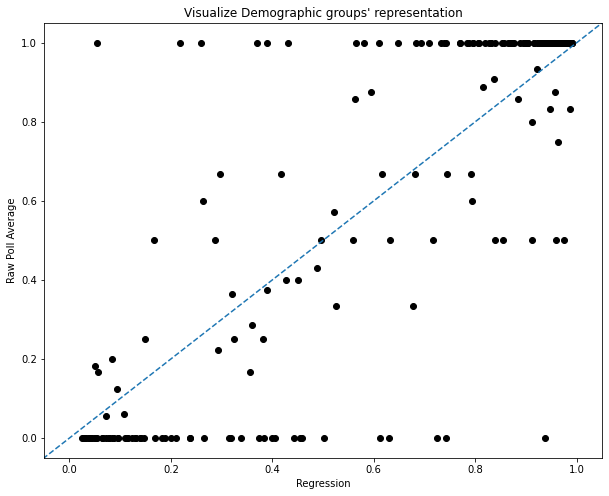

In [652]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

cmap = plt.cm.get_cmap("jet")
ax.scatter(df_covariate["Hillary(Pred)"].astype(float), df_covariate["Hillary(Actual)"].astype(float), c="k")

x = np.linspace(-1,2,10)
ax.plot(x, x, '--')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

ax.set_xlabel("Regression")
ax.set_ylabel("Raw Poll Average")
ax.set_title("Visualize Demographic groups' representation")

#### Step 4: Post-stratification

Although we did not observe any particular tendency of the model towards one candidate from the scatter plot, when post-stratifying to analyze the weighted results on the predictions, we can see a strong tendency in favor of  Hillary. 

The weighting of the predictions and the poll side by side give a clear overview of the demographic group pairs that the model found more difficult to predict, has they deviate quite significantly from the actual poll results.

In [653]:
from IPython.display import display_html
from itertools import chain,cycle

def display_sbs(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [654]:
demo_groups = df_covariate.columns[:5]

dim_joint_weighting_pred = pd.DataFrame(columns = ['Weighted By', 'And', 'Hillary', 'Trump'])

for i, dgroup1 in enumerate(demo_groups):
    for dgroup2 in demo_groups[i + 1:]:
        hillaryWeighted = 0.0
        for dtype1 in dfpoll[dgroup1].unique():
            for dtype2 in dfpoll[dgroup2].unique():

                if dtype1 == "Refused" or dtype2 == "Refused": 
                    continue
                
                signPreds  = df_covariate[(df_covariate[dgroup1] == dtype1) & \
                                          (df_covariate[dgroup2] == dtype2)]
                hillaryCurrWeighted = signPreds["Hillary(Pred)"].astype(float).sum() / len(signPreds)
                
                elec_dist = dfdemographic[((dfdemographic["Demographic_1"] == dtype1) & \
                                          (dfdemographic["Demographic_2"] == dtype2)) | \
                                          ((dfdemographic["Demographic_1"] == dtype2) & \
                                          (dfdemographic["Demographic_2"] == dtype1))
                                         ]["Electoral_Proportion"]

                elec_dist = float(elec_dist) if len(elec_dist) else 0.0

                hillaryWeighted += hillaryCurrWeighted * elec_dist
    
        hillaryWeighted = round(hillaryWeighted, 3)
        dim_joint_weighting_pred = dim_joint_weighting_pred.append({ \
                                        'Weighted By' : dgroup1,
                                        'And': dgroup2,
                                        'Hillary': str(hillaryWeighted), 
                                        'Trump': str(round(1 - hillaryWeighted, 3)) \
                                     }, ignore_index = True \
                                 )

display_sbs(dim_joint_weighting_pred, dim_joint_weighting, \
    titles = ["2D weighting predictions", "2D weighting poll"])


,Weighted By,And,Hillary,Trump
0,age,gender,0.614,0.386
1,age,party,0.52,0.48
2,age,race,0.548,0.452
3,age,education,0.603,0.397
4,gender,party,0.537,0.463
5,gender,race,0.559,0.441
6,gender,education,0.622,0.378
7,party,race,0.496,0.504
8,party,education,0.532,0.468
9,race,education,0.548,0.452


### 5) Bonus points (up to 2 points): Implement full "raking" using all the demographic covariates, i.e., match all the marginals without assuming independence, as opposed to just one or two marginal distributions.

<font color='blue'> You may use existing python packages, such as [here](https://github.com/Quantipy/quantipy3). Another approach would be to use [rpy2](https://rpy2.github.io/doc/latest/html/introduction.html) to call `R`, as there are many well-maintained packages in `R` to analyze polling data. One example is [here](https://www.rdocumentation.org/packages/survey/versions/4.1-1/topics/rake). 

## Part C: Uncertainty analysis, choices, and discussion

### 1) Education weighting analysis and "refused" answers

<font color='blue'> i. In Part B, you should notice a discrepancy from what we said in class and the data -- weighting by education does _not_ seem to help much in reducing the polling average from being pro-Clinton.

Here, we'll try to dig into the data to see why the methods we tried above might not be perfect, and what data you would want (such as demographic joint distribution) to do better. 

First, aggregate (using the groupby function) the poll results by education. Second, aggregate by education and some of the other covariates (for example, education and race, or education and party). Discuss in 4 sentences or less.

In aggregating the results for education levels, it is clear why weighting on education groups almost did not affect the polling average. 

We can see that the differences between the three levels are minimal and the averages are all very close to the raw polling average of 0.546 in Hillary's favor.

"Refused" entries are quite telling in this exercise as they seem to strongly favor Trump, hence the decision of ignoring those entries during the weighting introduced some bias towards Hillary.

In looking at 2D aggregates, we can appreciate that the "race" and "party" are demographic groups that strongly impact the voting preferences, as we can see that black and hispanics lean to the democrats while white are generally more Trump, and obviously almost all Democrats voted Hillary and almost all Republicans voted Trump, while Independents are very much balanced.

In [655]:
df_groupby_edu = hillaryOrTrumpPolls.groupby('education')['candidate'] \
                 .apply(lambda x: round((x == 'Hillary Clinton').sum() / (x == x).sum(), 3)) \
                 .reset_index(name='Hillary')
df_groupby_edu["Trump"] = 1 - df_groupby_edu["Hillary"]

df_groupby_edu_race = hillaryOrTrumpPolls.groupby(['education', 'race'])['candidate'] \
                      .apply(lambda x: round((x == 'Hillary Clinton').sum() / (x == x).sum(), 3)) \
                      .reset_index(name='Hillary')
df_groupby_edu_race["Trump"] = 1 - df_groupby_edu_race["Hillary"]


df_groupby_edu_party = hillaryOrTrumpPolls.groupby(['education', 'party'])['candidate'] \
                       .apply(lambda x: round((x == 'Hillary Clinton').sum() / (x == x).sum(), 3)) \
                       .reset_index(name='Hillary')
df_groupby_edu_party["Trump"] = 1 - df_groupby_edu_party["Hillary"]


In [656]:
display_sbs(df_groupby_edu, df_groupby_edu_race, df_groupby_edu_party, \
            titles = ["Education Aggregate", "Edu/Race Aggregate", "Edu/Party Aggregate"])

Education Aggregate 
 
 
 
 education 
 Hillary 
 Trump 
 
 
 
 
 0 
 College 
 0.552 
 0.448 
 
 
 1 
 High School 
 0.534 
 0.466 
 
 
 2 
 Refused 
 0.400 
 0.600 
 
 
 3 
 Some College 
 0.547 
 0.453 
 
 
 Edu/Race Aggregate 
 
 
 
 education 
 race 
 Hillary 
 Trump 
 
 
 
 
 0 
 College 
 Black 
 0.885 
 0.115 
 
 
 1 
 College 
 Hispanic 
 0.772 
 0.228 
 
 
 2 
 College 
 Other 
 0.667 
 0.333 
 
 
 3 
 College 
 Refused 
 0.500 
 0.500 
 
 
 4 
 College 
 White 
 0.445 
 0.555 
 
 
 5 
 High School 
 Black 
 0.926 
 0.074 
 
 
 6 
 High School 
 Hispanic 
 0.833 
 0.167 
 
 
 7 
 High School 
 Other 
 0.400 
 0.600 
 
 
 8 
 High School 
 Refused 
 0.000 
 1.000 
 
 
 9 
 High School 
 White 
 0.273 
 0.727 
 
 
 10 
 Refused 
 Black 
 1.000 
 0.000 
 
 
 11 
 Refused 
 Hispanic 
 0.000 
 1.000 
 
 
 12 
 Refused 
 Refused 
 0.333 
 0.667 
 
 
 13 
 Some College 
 Black 
 1.000 
 0.000 
 
 
 14 
 Some College 
 Hispanic 
 0.735 
 0.265 
 
 
 15 
 Some College 
 Other 
 0.800 
 0.200 
 
 
 16 
 Some College 
 Refused 
 0.400 
 0.600 
 
 
 17 
 Some College 
 White 
 0.401 
 0.599 
 
 
 Edu/Party Aggregate 
 
 
 
 education 
 party 
 Hillary 
 Trump 
 
 
 
 
 0 
 College 
 Democrat 
 0.943 
 0.057 
 
 
 1 
 College 
 Independent 
 0.495 
 0.505 
 
 
 2 
 College 
 Refused 
 1.000 
 0.000 
 
 
 3 
 College 
 Republican 
 0.084 
 0.916 
 
 
 4 
 High School 
 Democrat 
 0.902 
 0.098 
 
 
 5 
 High School 
 Independent 
 0.486 
 0.514 
 
 
 6 
 High School 
 Refused 
 1.000 
 0.000 
 
 
 7 
 High School 
 Republican 
 0.044 
 0.956 
 
 
 8 
 Refused 
 Democrat 
 1.000 
 0.000 
 
 
 9 
 Refused 
 Independent 
 0.000 
 1.000 
 
 
 10 
 Refused 
 Republican 
 0.000 
 1.000 
 
 
 11 
 Some College 
 Democrat 
 0.957 
 0.043 
 
 
 12 
 Some College 
 Independent 
 0.494 
 0.506 
 
 
 13 
 Some College 
 Refused 
 0.500 
 0.500 
 
 
 14 
 Some College 
 Republican 
 0.082 
 0.918

<font color='blue'> ii. You'll notice that there are some responses with "refused," and that those people in particular are Trump-leaning. Furthermore, there are likely many people who refused to answer the poll at all, who do not show up in the data. The weighting techniques we used above would ignore these people. How would you adjust your procedures/estimates above to take them into account? Answer in at most 3 sentences.

I would try the following tecniques to include "refused" data in the analysis:
- I could train a model to predict the education level of each "refused" observation and use it to populate the data or use the electoral proportion to populate the "refused" entries with what aligns the most with the electoral proportion of the demographic.
- I could leave them as "refused" but account for perform weighting on it as any other education level class to account for it.

Concerning people who refused to answer the poll at all, I think that one way to partially account for them would be to roughly predict a percentage of people who do not wish to take part and then oversample rows where people refused to reply to certain parts of the survey as those are the demographics closest to the people who refused to answer at all.


<font color='blue'> None of the above techniques deal with selection biases/non-response on _un-measured_ covariates. Do you think that may be an important concern in this dataset? Why or why not? Respond in 3 or fewer sentences.

Yes, accounting for selection bias and non-resposes is paramount in this case since many individuals in 2016 might refrain from expressing a favor towards Trump due to social desirability biases, hence might have lied or decided not to answer at all.

Moreover, many un-measured covariates could offer great insight in the data, such as work industry or income class to weight the estimates also from a social class standpoint.


### 2) Final estimates

<font color='blue'> Throughout this homework, you made many estimates of the same quantity -- the fraction of people who will vote for Clinton in Florida. Below, plot a histogram of all your estimates.

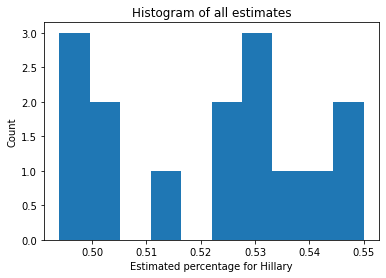

In [657]:
combine_all_pred = pd.concat([
    dim_marginal_weighting["Hillary"].astype(float), \
    dim_joint_weighting["Hillary"].astype(float)
])

plt.hist(combine_all_pred)
plt.xlabel("Estimated percentage for Hillary")
plt.ylabel("Count")
plt.title("Histogram of all estimates")
plt.show()

<font color='blue'> Given all your above analysis, if you were a pollster what would you report as your single estimate? 

In [658]:
print(combine_all_pred.mean())

0.522


Hillary: 0.489 

Trump: 0.511

<font color='blue'> Justify your choice, in at most 3 sentences

The average prediction favors Hillary at around 0.52, however, as seen in the first scatter plot, the Republicans are significantly underrepresented and that is obviously a very telling demographic group on the voter's preference. 

Therefore, definitely the estimate weighted by party is an indicator of some bias in the average prediction towards Hillary. 

Considering further that the "Refused" entries were significantly pro-Trump and were not considered in the weighting, and all other demographic groups aside from gender also adjusted the estimates in favor of the republicans, I decided as my final estimate as a full point less than the estimate weighted by party.



<font color='blue'> Though we did not discuss how to calculate margin of error or standard errors with weighting in this course, what would you say if someone asked you how confident you are in your estimate? You may either qualitatively answer, or try to come up with a margin of error.  

I think that the margin of error is quite large as we are basing the whole data analysis on a single poll and a single estimate of the electoral proportion of different demographic groups. 

However, I think that the analysis conducted correctly showcases that the poll data is significantly skewed towards Hillary, which is what I account for in my final prediction that is much closer to the actual results of the presidential race. 

Therefore, I believe the error in my prediction will come mostly from the arbitrary decision that "Refused" education levels plus the weighting effects on the other demographic groups would account for roughly one more point in favor of Trump. Therefore as a margin of error I would say that I am confident my prediction would lie within a [-2%, +2%] range from the actual results.

